# Pulsars

![SegmentLocal](pulsars.gif "segment")

In [1]:
import pandas as pd
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import urllib
import math
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# tf.enable_eager_execution()

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/pulsar_stars/pulsar_stars.csv')

In [3]:
columns = data.columns
IP1, IP2, IP3, IP4 = columns[0], columns[1], columns[2], columns[3]
DM1, DM2, DM3, DM4 = columns[4], columns[5], columns[6], columns[7]

data = data.rename(columns={ 
    columns[0]: 'IP1', columns[1]: 'IP2', columns[2]: 'IP3', columns[3]: 'IP4',
    columns[4]: 'DM1', columns[5]: 'DM2', columns[6]: 'DM3', columns[7]: 'DM4',
    columns[8]: 'target'
})

In [4]:
data.describe()

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
data.head(5)

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[['IP1', 'IP2', 'IP3', 'IP4', 'DM1', 'DM2', 'DM3', 'DM4']] = scaler.fit_transform(data[['IP1', 'IP2', 'IP3', 'IP4', 'DM1', 'DM2', 'DM3', 'DM4']].to_numpy())
scaled_data.head(5)

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4,target
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,0
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,0
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,0
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,0
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,0


In [7]:
# palette = sns.color_palette(["#bbbbbb","#9b59b6"])

# pg = sns.PairGrid(scaled_data, palette=palette, hue="target", hue_order=[0, 1],
#              vars=['IP1', 'IP2', 'IP3', 'IP4', 'DM1', 'DM2', 'DM3', 'DM4'])

# pg.map_diag(sns.kdeplot)
# pg.map_offdiag(plt.scatter, s=2, alpha=0.2)

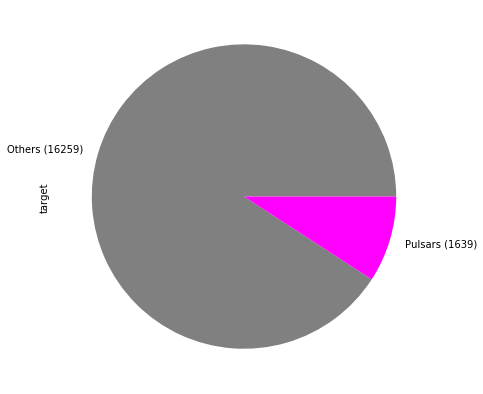

In [8]:
number_of_others, number_of_pulsars = scaled_data.target.value_counts()
scaled_data.target.value_counts().plot(kind='pie', labels=['Others (' + str(number_of_others) + ')', 'Pulsars (' + str(number_of_pulsars) + ')'], figsize=(7, 7), colors = ['gray', 'magenta'])

In [9]:
scaled_data.head(5)

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4,target
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,0
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,0
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,0
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,0
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,0


In [10]:
scaled_data_without_target = scaled_data.filter(regex="[^target]")
x_train, x_test, y_train, y_test = train_test_split(scaled_data_without_target.values, scaled_data.target.values, test_size=0.01, random_state = 4)

sm = ADASYN()
x_train_oversampled, y_train_oversampled = sm.fit_sample(x_train, y_train)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

form = lr.score(x_test, y_test) * 100
print("Random Forrest accuracy : {0:.2f}%".format(form))

Random Forrest accuracy : 97.21%


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)

form = knn.score(x_test, y_test) * 100
print("KNN accuracy : {0:.2f}%".format(form))

KNN accuracy : 98.32%


In [13]:
from sklearn.svm import SVC

ssvm = SVC(gamma='auto')
ssvm.fit(x_train, y_train)
form = ssvm.score(x_test, y_test) * 100
print("SVM Accuracy : {0:.2f}%".format(form))

SVM Accuracy : 97.77%


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
form = dt.score(x_test, y_test) * 100
print("Decision Tree Accuracy : {0:.2f}%".format(form))

Decision Tree Accuracy : 98.32%


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 3)
rf.fit(x_train, y_train)
form = rf.score(x_test, y_test) * 100
print("Random Forrest accuracy : {0:.2f}%".format(form))

Random Forrest accuracy : 98.88%


In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
form = nb.score(x_test, y_test) * 100
print("Naive Bayes accuracy : {0:.2f}%".format(form))

Naive Bayes accuracy : 94.41%


In [17]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF

# kernel = 1.0 * RBF([1.0])
# gpc = GaussianProcessClassifier(kernel=kernel)
# gpc.fit(x_train, y_train)


# form = gpc.score(x_test, y_test) * 100
# print("Gaussian Process Classifier accuracy : {0:.2f}%".format(form))

In [18]:
d = pd.get_dummies(scaled_data['target'])
scaled_data_encoded_target = pd.concat([scaled_data, d], axis = 1)
scaled_data_encoded_target.drop('target', axis = 1, inplace = True)

from sklearn.model_selection import train_test_split
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(scaled_data_encoded_target.drop([0, 1], axis = 1),
                                                                scaled_data_encoded_target[[0, 1]],
                                                                test_size = 0.2,
                                                                random_state = 5)
# 5 : 98.43

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential([
    Dense(256, input_shape = (8,), activation='tanh'),
    Dense(128, input_shape = (8,), activation='tanh'),
    Dense(2, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train_nn, y_train_nn, epochs = 10, batch_size = 32)

score = model.evaluate(x_test_nn, y_test_nn)
print('Accuracy(on Test-data): ' + str(score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
14318/14318 [==============================] - 3s 232us/step - loss: 0.0977 - acc: 0.9733
Epoch 2/10
14318/14318 [==============================] - 3s 181us/step - loss: 0.0800 - acc: 0.9774
Epoch 3/10
14318/14318 [==============================] - 3s 215us/step - loss: 0.0767 - acc: 0.9777
Epoch 4/10
14318/14318 [==============================] - 3s 234us/step - loss: 0.0746 - acc: 0.9772
Epoch 5/10
14318/14318 [==============================] - 4s 251us/step - loss: 0.0739 - acc: 0.9783
Epoch 6/10
14318/14318 [==============================] - 4s 254us/step - loss: 0.0726 - acc: 0.9786
Epoch 7/10
14318/14318 [==============================] - 4s 264us/step - loss: 0.0724 - acc: 0.9788
Epoch 8/10
14318/14318 [==============================] - 3s 233us/step - loss: 0.0720 - acc: 0.9789
Epoch 9/10
14318/14318 [==============================] - 3s 241us/step 

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_classes(scaled_data_without_target)
con_mat = confusion_matrix(scaled_data.target.T.values, y_pred)

In [23]:
con_mat

array([[16145,   114],
       [  233,  1406]])

In [ ]:
scaled_data.target.T.values.size

In [ ]:
x_test_nn.size / 8

In [ ]:
x_train_nn.size / 8